# Set Up Environment

In [ ]:
# install some libraries
!pip install -U tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflo

## Import Packages

In [3]:
import random
import os
import glob
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

import cv2
from tqdm.notebook import tqdm


import tensorflow as tf
# import tensorflow_hub as hub
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
from scikitplot.metrics import plot_roc
from torchvision.io import read_image, ImageReadMode

In [1]:
import cv2
print(cv2.__version__)

ModuleNotFoundError: No module named 'cv2'

In [3]:
import tensorflow
print(tensorflow.__version__)

2.18.0


## Define the Hyperparameters

In [4]:
EPOCHS = 65
BATCH_SIZE = 16
CHANNELS = 3
IMAGE_SIZE = 125


# Load the Dataset

In [5]:
# Define paths
DATASET_PATH = "D:\dataset\IMG_CLASSES"

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\punya\AppData\Local\Temp\ipykernel_23800\3642149179.py:2: SyntaxWarning: invalid escape sequence '\d'
  DATASET_PATH = "D:\dataset\IMG_CLASSES"


## Save the dataset in DataFrame

In [6]:
# get a list of all the directories inside the brain directory
class_dirs = os.listdir(DATASET_PATH)

# create empty lists to store the image names and class names
image_names = []
image_names1 = []
class_names = []

# iterate over each class directory
for class_dir in class_dirs:
    # get the path to the current class directory
    class_path = os.path.join(DATASET_PATH, class_dir)
    
    # iterate over each image file inside the current class directory
    for image_file in os.listdir(class_path):
        # get the path to the current image file
        image_path = os.path.join(class_path, image_file)
        
         # append the image name and class name to their respective lists
        image_names.append(image_path)
        image_names1.append(os.path.join(class_dir, image_file))
        class_names.append(class_dir)
        
# create a dataframe with two columns: image name and class name
df_visualize = pd.DataFrame({'image_name': image_names, 'class_name': class_names}).sample(frac = 1, random_state=73)

# create a dataframe with two columns: image name and class name to train
df_train = pd.DataFrame({'image_name': image_names1, 'class_name': class_names}).sample(frac = 1, random_state=73)


In [7]:
# create a dictionary to map old names to new names
name_map = {"Psoriasis pictures Lichen Planus and related diseases": "Psoriasis and Lichen Planus", "Warts Molluscum and other Viral Infections": "Warts Molluscum", "Tinea Ringworm Candidiasis and other Fungal Infections": "Tinea Ringworm Candidiasis", "Seborrheic Keratoses and other Benign Tumors": "Seborrheic Keratoses"}

# replace the old names with new names in the dataframe
df_visualize = df_visualize.replace({'class_name': name_map})

# replace the old names with new names in the dataframe_train
df_train = df_train.replace({'class_name': name_map})

In [8]:
# Display the dataframe_visualize of dataset
df_visualize

,image_name,class_name
21430,D:\dataset\IMG_CLASSES\6. Benign Keratosis-lik...,6. Benign Keratosis-like Lesions (BKL) 2624
12683,D:\dataset\IMG_CLASSES\5. Melanocytic Nevi (NV...,5. Melanocytic Nevi (NV) - 7970
19743,D:\dataset\IMG_CLASSES\6. Benign Keratosis-lik...,6. Benign Keratosis-like Lesions (BKL) 2624
25560,D:\dataset\IMG_CLASSES\9. Tinea Ringworm Candi...,9. Tinea Ringworm Candidiasis and other Fungal...
22079,D:\dataset\IMG_CLASSES\7. Psoriasis pictures L...,7. Psoriasis pictures Lichen Planus and relate...
...,...,...
16144,D:\dataset\IMG_CLASSES\5. Melanocytic Nevi (NV...,5. Melanocytic Nevi (NV) - 7970
8586,D:\dataset\IMG_CLASSES\4. Basal Cell Carcinoma...,4. Basal Cell Carcinoma (BCC) 3323
4014,D:\dataset\IMG_CLASSES\2. Melanoma 15.75k\ISIC...,2. Melanoma 15.75k
24722,D:\dataset\IMG_CLASSES\8. Seborrheic Keratoses...,8. Seborrheic Keratoses and other Benign Tumor...


In [9]:
# Display the dataframe_train of dataset
df_train

,image_name,class_name
21430,6. Benign Keratosis-like Lesions (BKL) 2624\IS...,6. Benign Keratosis-like Lesions (BKL) 2624
12683,5. Melanocytic Nevi (NV) - 7970\ISIC_0012844_d...,5. Melanocytic Nevi (NV) - 7970
19743,6. Benign Keratosis-like Lesions (BKL) 2624\IS...,6. Benign Keratosis-like Lesions (BKL) 2624
25560,9. Tinea Ringworm Candidiasis and other Fungal...,9. Tinea Ringworm Candidiasis and other Fungal...
22079,7. Psoriasis pictures Lichen Planus and relate...,7. Psoriasis pictures Lichen Planus and relate...
...,...,...
16144,5. Melanocytic Nevi (NV) - 7970\ISIC_0028213.jpg,5. Melanocytic Nevi (NV) - 7970
8586,4. Basal Cell Carcinoma (BCC) 3323\ISIC_003172...,4. Basal Cell Carcinoma (BCC) 3323
4014,2. Melanoma 15.75k\ISIC_6725178.jpg,2. Melanoma 15.75k
24722,8. Seborrheic Keratoses and other Benign Tumor...,8. Seborrheic Keratoses and other Benign Tumor...


## Load class names

In [10]:
# get class names associated with dataset images
categories = ['Atopic Dermatitis', 'Basal Cell Carcinoma', 'Benign Keratosis-like Lesions (BKL)', 'Eczema', 'Melanocytic Nevi', 'Melanoma', 'Psoriasis and Lichen Planus', 'Seborrheic Keratoses', 'Tinea Ringworm Candidiasis', 'Warts Molluscum']
print(categories)

['Atopic Dermatitis', 'Basal Cell Carcinoma', 'Benign Keratosis-like Lesions (BKL)', 'Eczema', 'Melanocytic Nevi', 'Melanoma', 'Psoriasis and Lichen Planus', 'Seborrheic Keratoses', 'Tinea Ringworm Candidiasis', 'Warts Molluscum']


# Exploratory Data Analysis

## Display the Number of images associated with each class

In [11]:
print(f"values of each class in train data: {df_visualize['class_name'].value_counts()}")

values of each class in train data: class_name
5. Melanocytic Nevi (NV) - 7970                                     7970
4. Basal Cell Carcinoma (BCC) 3323                                  3323
2. Melanoma 15.75k                                                  3140
10. Warts Molluscum and other Viral Infections - 2103               2103
6. Benign Keratosis-like Lesions (BKL) 2624                         2079
7. Psoriasis pictures Lichen Planus and related diseases - 2k       2055
8. Seborrheic Keratoses and other Benign Tumors - 1.8k              1847
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k    1702
1. Eczema 1677                                                      1677
3. Atopic Dermatitis - 1.25k                                        1257
Name: count, dtype: int64


## Display the difference of values between each class

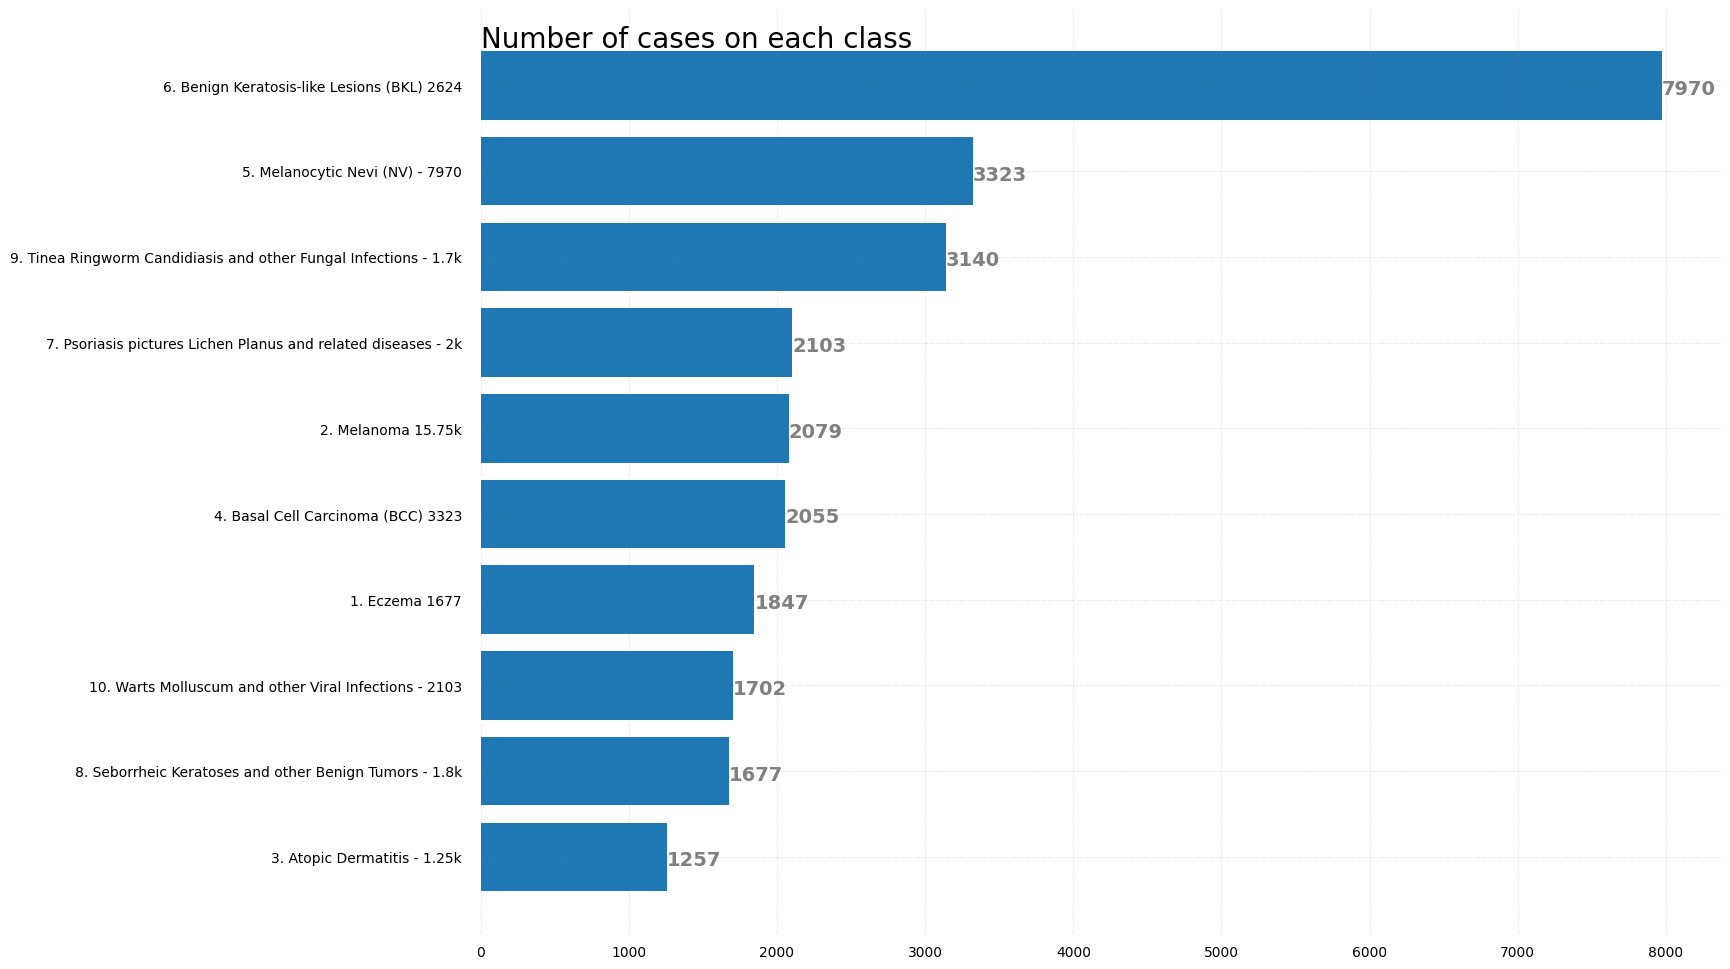

In [12]:
 # Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
 
# Horizontal Bar Plot
ax.barh(df_visualize['class_name'].unique(), df_visualize['class_name'].value_counts())
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 14, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of cases on each class', y=0.95, fontsize=20,
             loc ='left')
 
# Show Plot
plt.show()

## Display the percentage of each class in dataset

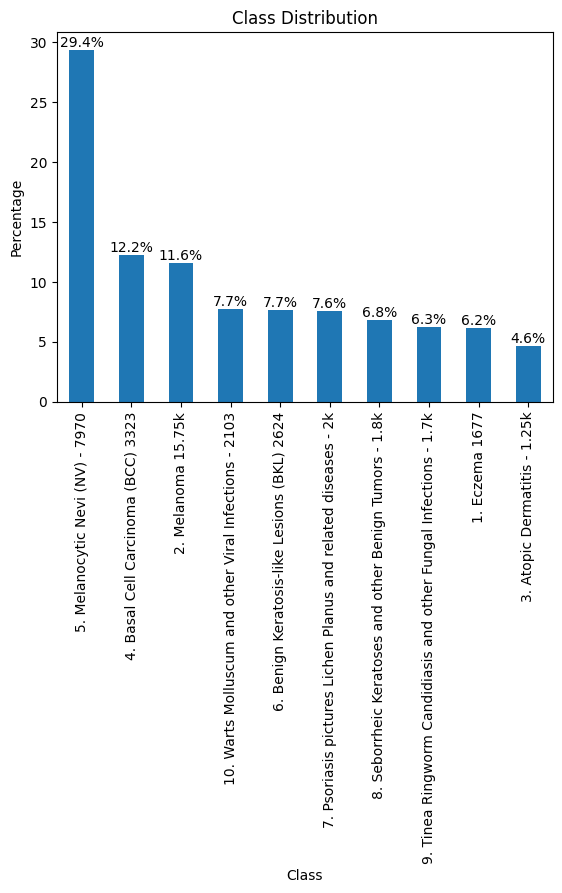

In [13]:
# calculate the percentage of each class in 'col1'
class_percentages = df_visualize['class_name'].value_counts(normalize=True) * 100

# plot the percentage for each class in 'col1' as a bar plot
ax = class_percentages.plot(kind='bar')
ax.set_xlabel('Class')
ax.set_ylabel('Percentage')
ax.set_title('Class Distribution')

# add text annotations to the plot
for i, v in enumerate(class_percentages):
    ax.annotate(f"{v:.1f}%", xy=(i, v), ha='center', va='bottom')

plt.show()

## Display a sample image in each class

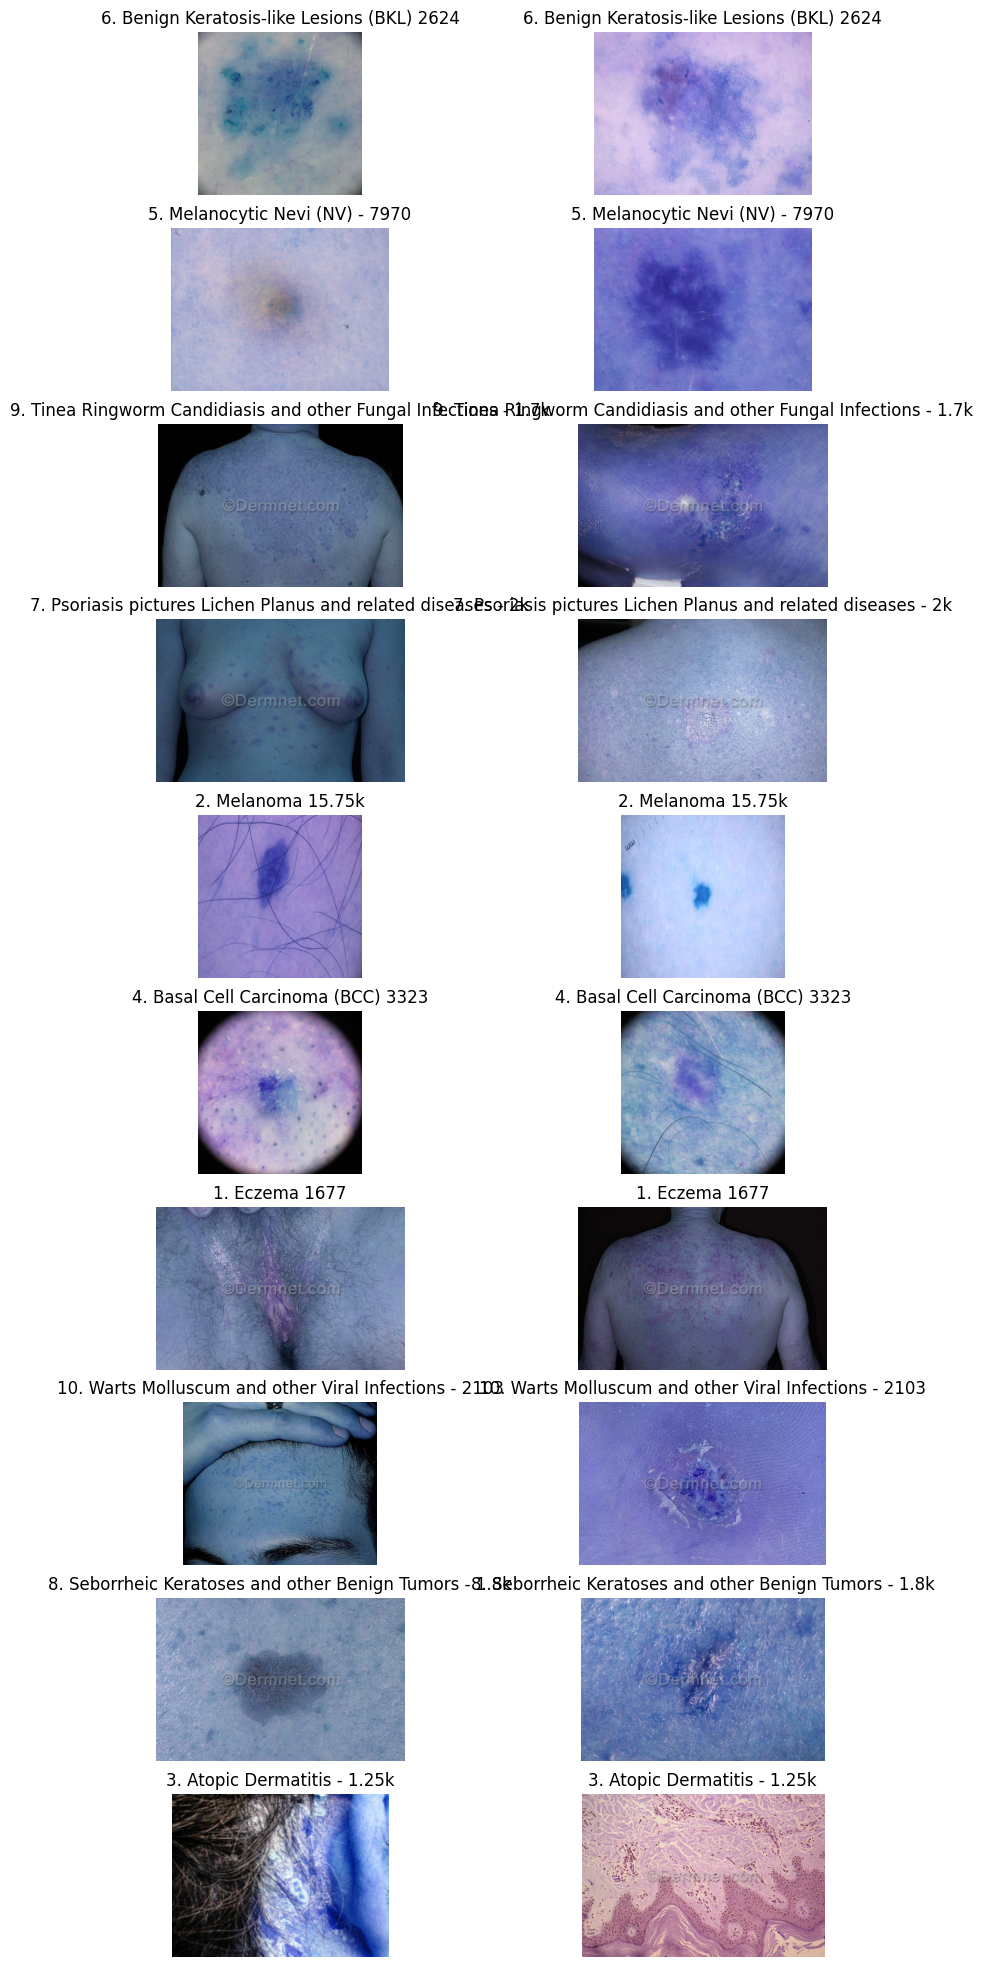

In [15]:
# Display some sample images
fig, axs = plt.subplots(10, 2, figsize=(10, 25))
for i, label in enumerate(df_visualize['class_name'].unique()):
    label_df = df_visualize[df_visualize['class_name'] == label].sample(min(20, len(df_visualize[df_visualize['class_name'] == label])))
    for j, row in label_df.iterrows():
        img = cv2.imread(row['image_name'])
        axs[i, j % 2].imshow(img)
        axs[i, j % 2].axis('off')
        axs[i, j % 2].set_title(label)
plt.show()

# Pre-Processing the data

## Dataset Partitioning

In [16]:
# split the data to train and test
train_d, test_df = train_test_split(df_train, train_size=0.9, random_state=0)
# split the train data to train and validation
train_df, val_df = train_test_split(train_d, train_size=0.9, random_state=0)

In [17]:
# Display how many images for training and validation and testing
print(f"values of each class in train data: {train_df['class_name'].value_counts()}")
print(f"values of each class in validation data: {val_df['class_name'].value_counts()}")
print(f"values of each class in test data: {test_df['class_name'].value_counts()}")

values of each class in train data: class_name
5. Melanocytic Nevi (NV) - 7970                                     6445
4. Basal Cell Carcinoma (BCC) 3323                                  2702
2. Melanoma 15.75k                                                  2570
6. Benign Keratosis-like Lesions (BKL) 2624                         1700
10. Warts Molluscum and other Viral Infections - 2103               1700
7. Psoriasis pictures Lichen Planus and related diseases - 2k       1683
8. Seborrheic Keratoses and other Benign Tumors - 1.8k              1450
1. Eczema 1677                                                      1365
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k    1346
3. Atopic Dermatitis - 1.25k                                        1032
Name: count, dtype: int64
values of each class in validation data: class_name
5. Melanocytic Nevi (NV) - 7970                                     709
2. Melanoma 15.75k                                                  290
4

## Image Data Generator for resize and shuffle and encode

In [18]:
# images data generator
train_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_dataframe(dataframe = train_df, 
                                            directory=DATASET_PATH, # This is the source directory for training images
                                            x_col='image_name', 
                                            y_col='class_name',
                                            color_mode='rgb',
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE), # All images will be resized to 224x224
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            class_mode='categorical')  

valid_gen = train_datagen.flow_from_dataframe(dataframe = val_df, 
                                            directory=DATASET_PATH, # This is the source directory for training images
                                            x_col='image_name', 
                                            y_col='class_name', 
                                            color_mode='rgb',
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE), # All images will be resized to 224x224
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            class_mode='categorical')  

test_gen = train_datagen.flow_from_dataframe(dataframe = test_df, 
                                            directory=DATASET_PATH, # This is the source directory for training images
                                            x_col='image_name', 
                                            y_col='class_name', 
                                            color_mode='rgb',
                                            shuffle=True,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE), # All images will be resized to 224x224
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical') 

Found 21993 validated image filenames belonging to 10 classes.
Found 2444 validated image filenames belonging to 10 classes.
Found 2716 validated image filenames belonging to 10 classes.


# ANN architecture

## Pre-trained model (Extract Features)

In [20]:
ENV = tf.keras.applications.EfficientNetV2S(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Here we freeze the layers 
# Layers are set to trainable as True by default
for layer in ENV.layers:
    layer.trainable = False

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 467s 6us/step


### Get the pre-trained model Summary

In [ ]:
# Summary for the Layers of Pre_trained model
ENV.summary()

## Define the Architecture

In [22]:
from tensorflow.keras.models import Model
import tensorflow as tf

num_classes = 10
top_model = ENV.output
top_model = tf.keras.layers.GlobalAveragePooling2D()(top_model)
top_model = tf.keras.layers.Dense(256, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(256, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(128, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(128, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(num_classes, activation='softmax')(top_model)

model = Model(inputs=ENV.input, outputs=top_model)


## Compiling the model
### The compilation is performed using one single method call called compile.

The compile method requires several parameters. The loss parameter is specified to have type 'categorical_crossentropy'. The metrics parameter is set to 'accuracy' and finally we use the adam optimizer for training the network.

The output at this stage is shown below −

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# ✅ Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), 
              optimizer=optimizer, 
              metrics=['accuracy'])

# ✅ Print model summary to verify the structure
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 125, 125,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 125, 125,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 63, 63,    │        648 │ rescaling_1[0][0] │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 63, 63,    │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 63, 63,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 63, 63,    │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 63, 63,    │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 63, 63,    │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 63, 63,    │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 63, 63,    │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 63, 63,    │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 63, 63,    │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 63, 63,    │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 63, 63,    │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 32, 32,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 32, 32,    │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 32, 32,    │          0 │ block2a_expand_b

 Total params: 20,775,786 (79.25 MB)

 Trainable params: 444,426 (1.70 MB)

 Non-trainable params: 20,331,360 (77.56 MB)

# Overview of the Architecture

## Visualize The ANN Architecture
(Layers: Input - Hidden - Output) 

In [26]:
# Visualize the Layers of the Model architecture
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'convnet.png'

In [27]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Save the model architecture as an image
plot_model(model, to_file='convnet.png', show_shapes=True, show_layer_names=True)

# Display the image
Image(filename='convnet.png')


You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'convnet.png'

# Training Phase

## Train the ANN model
### The model training is done in one single method call called fit that takes few parameters as seen in the code below

The first two parameters to the fit method specify the features and the output of the training dataset.

The epochs is set to 65; we assume that the training will converge in max 65 epochs - the iterations. 

The trained model is validated on the test data as specified in the last parameter.

In [28]:
# train the model using fit
history = model.fit(
    train_gen,
    batch_size=BATCH_SIZE,
    validation_data=valid_gen,
    verbose=1,
    epochs=EPOCHS
)

c:\Users\punya\OneDrive\Documents\Punyata 1\Placemenets\projects\Gitable\ML\Movie Recommender System\tf-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/65
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 888s 609ms/step - accuracy: 0.5646 - loss: 1.1449 - val_accuracy: 0.6567 - val_loss: 0.8761
Epoch 2/65
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 710s 515ms/step - accuracy: 0.6793 - loss: 0.8467 - val_accuracy: 0.6989 - val_loss: 0.8342
Epoch 3/65
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 627s 455ms/step - accuracy: 0.7193 - loss: 0.7570 - val_accuracy: 0.7177 - val_loss: 0.7636
Epoch 4/65
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 501s 364ms/step - accuracy: 0.7456 - loss: 0.6814 - val_accuracy: 0.7238 - val_loss: 0.7681
Epoch 5/65
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 536s 390ms/step - accuracy: 0.7646 - loss: 0.6348 - val_accuracy: 0.7467 - val_loss: 0.7321
Epoch 6/65
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 555s 403ms/step - accuracy: 0.7883 - loss: 0.5840 - val_accuracy: 0.7439 - val_loss: 0.7131
Epoch 7/65
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 386s 280ms/step - accuracy: 0.7991 - loss: 0.5472 - val_accuracy: 0.7475 - val_loss: 0.7456
Epoch 8/65
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 380s 276ms/step - ac

In [29]:
model.save("model.h5")

In [31]:
model.save('my_model.keras')

In [30]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model, file)  # Only use this if necessary


# Visualizing the model Metrics

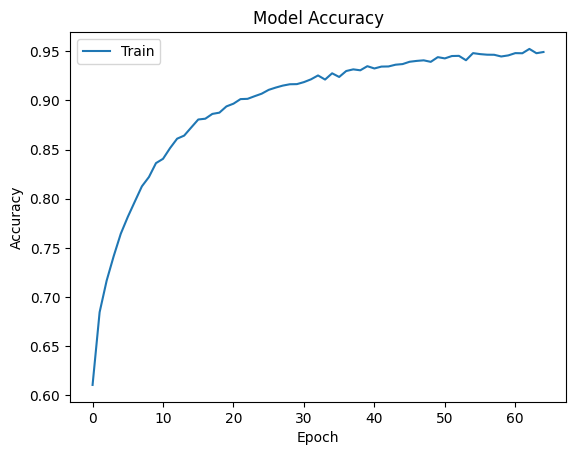

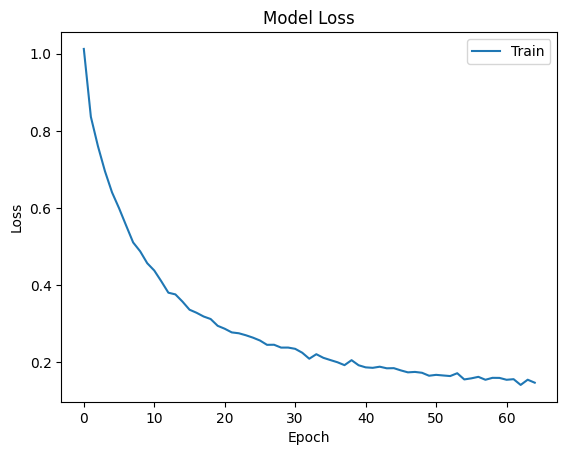

In [32]:
# visualize the model accuracy for the training data
plt.plot(history.history['accuracy'], label='Train')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# visualize the model loss for the training data
plt.plot(history.history['loss'], label='Train')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Model Evaluation

In [33]:
# model evaluation to know the accuracy
model.evaluate(test_gen)

170/170 ━━━━━━━━━━━━━━━━━━━━ 87s 512ms/step - accuracy: 0.7624 - loss: 1.2096


[1.2353801727294922, 0.7603092789649963]

## Save model history

In [ ]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# Testing the model

1/1 [==============================] - 3s 3s/step


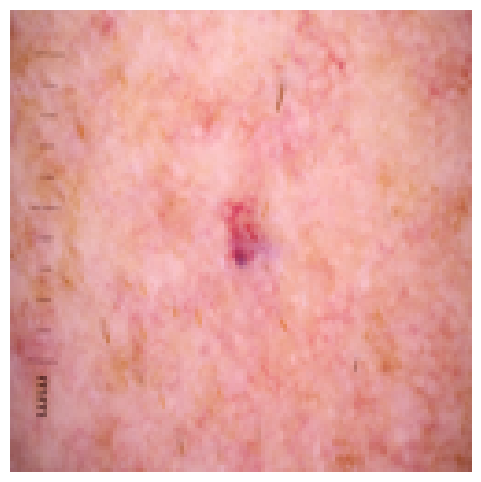

Predicted case -> Melanoma


In [ ]:
# Testing the model using sample image
image_path = "/kaggle/input/skin-diseases-for-10-case/IMG_CLASSES/Melanoma/ISIC_7284370.jpg"
image = tf.keras.preprocessing.image.load_img(image_path)
image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
image_array = tf.keras.preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

# Use model to predict the sample image
pred = model.predict(scaled_img)
# show the output of predicted image
output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)

In [ ]:
import pickle


In [ ]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
